### Import dependencies

In [53]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
# Import pandas to create dataframe
import pandas as pd

### Read climate data to dataframe

In [141]:
# Read climate data from CSV to Pandas DataFrame
climate_change = pd.read_csv('C:\\Users\\Robert.Jones\\Documents\\Python_Projects\\data_visualization\\weather_data\\climate_change.csv', parse_dates=["date"], index_col="date")

### Explore the datasets

In [55]:
# Brief exploration of climate dataframe
climate_change.style

,co2,relative_temp,co2_int,relative_temp_int
date,,,,
1958-03-06 00:00:00,315.710000,0.100000,31571,10
1958-04-06 00:00:00,317.450000,0.010000,31745,1
1958-05-06 00:00:00,317.500000,0.080000,31750,8
1958-06-06 00:00:00,nan,-0.050000,0,-5
1958-07-06 00:00:00,315.860000,0.060000,31586,6
1958-08-06 00:00:00,314.930000,-0.060000,31493,-6
1958-09-06 00:00:00,313.200000,-0.030000,31320,-3
1958-10-06 00:00:00,nan,0.040000,0,4
1958-11-06 00:00:00,313.330000,0.020000,31333,2


In [56]:
# Print schema and core info
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   co2                699 non-null    float64
 1   relative_temp      706 non-null    float64
 2   co2_int            706 non-null    int64  
 3   relative_temp_int  706 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 27.6 KB


## Work with climate data

Text(0.5, 1.0, 'Relative Temperature by Years')

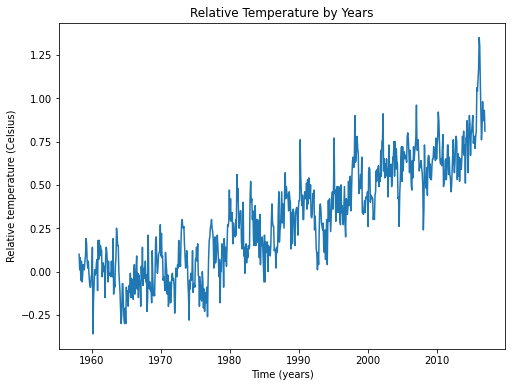

In [57]:
# Create figure and axes
fig, ax = plt.subplots()

# Adjust figure for visibility
fig.set_size_inches(8,6)

# Plot relative_temp by time
ax.plot(climate_change.index,climate_change["relative_temp"])

# Set title and axes labels
ax.set_xlabel("Time (years)")
ax.set_ylabel("Relative temperature (Celsius)")
ax.set_title("Relative Temperature by Years")



### Show window of climate data (Temperature in 1970s)

Text(0, 0.5, 'Relative temperature (Celsius)')

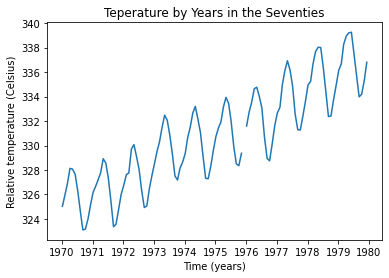

In [58]:
# Create figure and axes
fig, ax = plt.subplots()

# Take slice of dates from climate_change and set it to "seventies"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Plot the slice
ax.plot(seventies.index, seventies["co2"])

#Set title and axes
ax.set_title("Teperature by Years in the Seventies")
ax.set_xlabel("Time (years)")
ax.set_ylabel("Relative temperature (Celsius)")

### Overlay temperature and co2 by time

Text(2008-10-06 00:00:00, -0.2, '>1 degree')

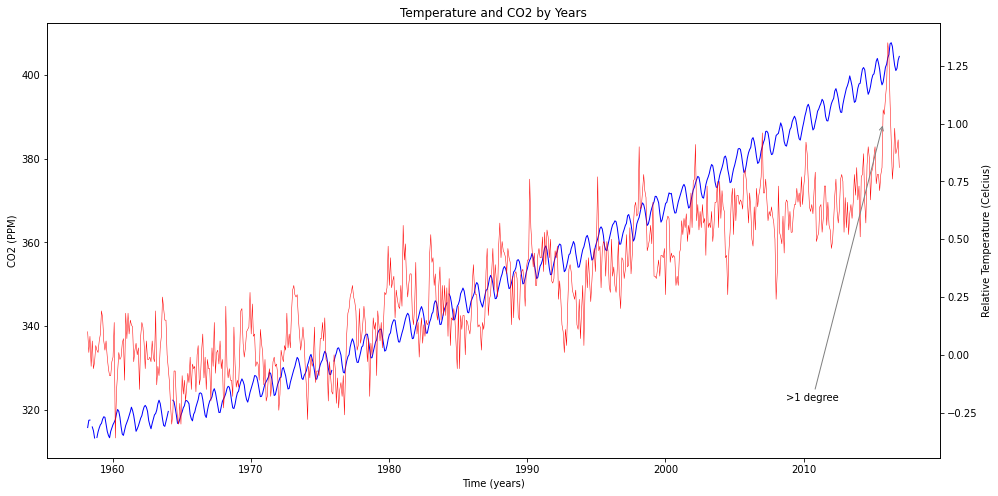

In [59]:
# Create figure and axes
fig, ax = plt.subplots()

# Adjust figure for visibility
fig.set_size_inches(16,8)

# Plot CO2 in blue
ax.plot(climate_change.index, climate_change["co2"], color='b',linewidth = 1)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='r', linewidth = .5)

#Set title and axes
ax.set_xlabel("Time (years)")
ax.set_ylabel("CO2 (PPM)")
ax2.set_ylabel("Relative Temperature (Celcius)")
ax.set_title("Temperature and CO2 by Years")


# Add annotation for >1 degree relative temperature change
ax2.annotate(">1 degree", 
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
            xy=(pd.Timestamp('2015-10-06'), 1), arrowprops=dict(arrowstyle='->', color='gray'))

### Linear regression of temperature

In [219]:
climate_change.shape[0] /2

353.0

Text(31, 1.1, 'slope = 0.015')

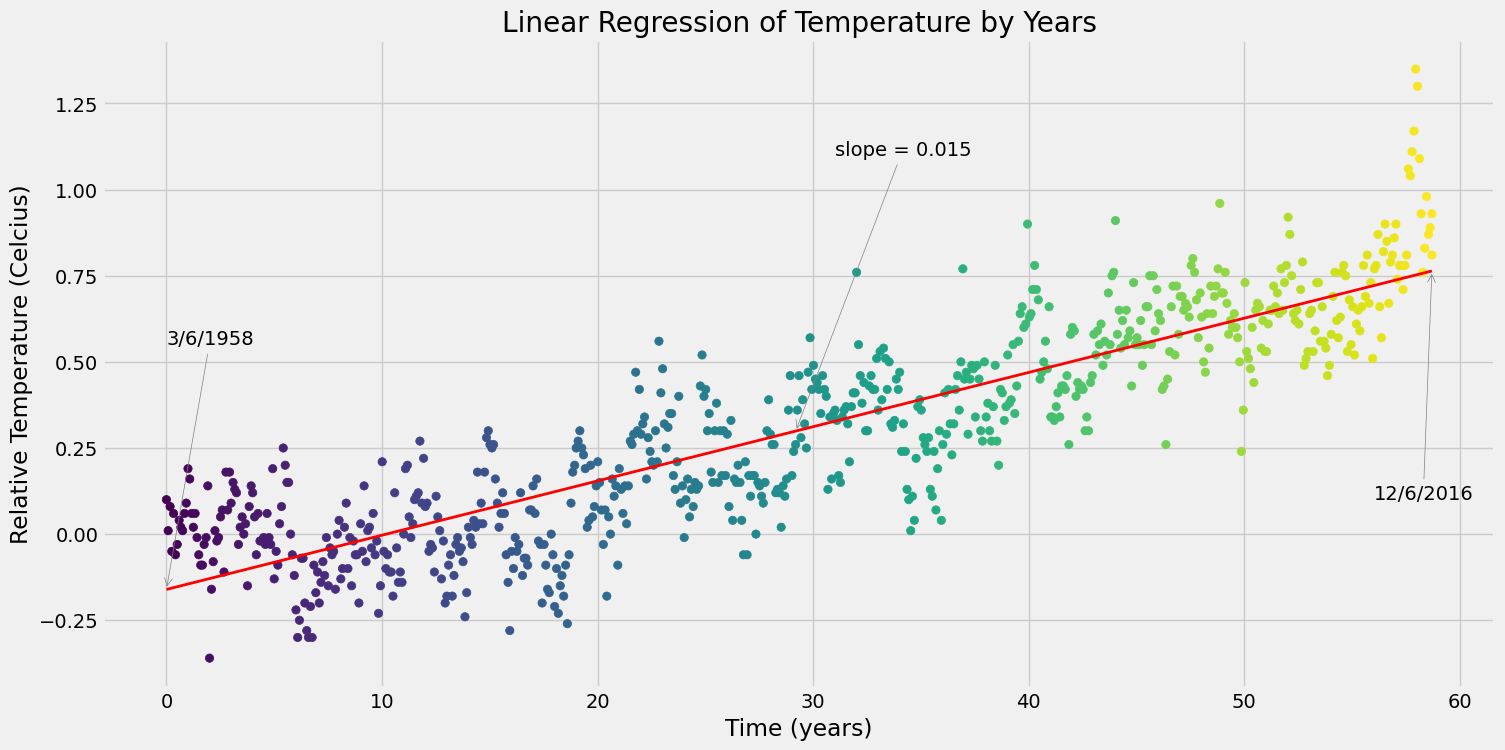

In [281]:
# Dependancy for linear regression modeling
from sklearn.linear_model import LinearRegression

# Use aesthetic style
plt.style.use('fivethirtyeight')

# Create figure and axes
fig, ax = plt.subplots()

# Adjust figure for visibility
fig.set_size_inches(16,8)

# Plot relative temperature with color temperature
ax.scatter(climate_change.years_elapsed, climate_change["relative_temp"], c=climate_change.years_elapsed)

# Plot linear regression of temperature in red
x = climate_change.years_elapsed.values.reshape(-1,1)
y = climate_change.relative_temp.values.reshape(-1,1)
linear_regressor = LinearRegression().fit(x,y)
y_pred = linear_regressor.predict(x)
ax.plot(x,y_pred,color='r',linewidth = 2)

#Set title and axes
ax.set_xlabel("Time (years)")
ax.set_ylabel("Relative Temperature (Celcius)")
ax.set_title("Linear Regression of Temperature by Years")

# Annotate first date, last date, slope

#... First date
ax.annotate("3/6/1958", xytext = (0,.55),
            xy=(x[0],y_pred[0]),arrowprops=dict(arrowstyle='->', color='gray'))

#... Last date
ax.annotate("12/6/2016", xytext = (56,.1),
            xy=(x[-1],y_pred[-1]),arrowprops=dict(arrowstyle='->', color='gray'))


#... Slope of linear regression
slope = linear_regressor.coef_
slope_join = ' '.join(map(str,slope))
slope_print = pr[1:6]

ax.annotate("slope = "+slope_print, xytext = (31,1.1),
            xy=(x[350],y_pred[350]),arrowprops=dict(arrowstyle='->', color='gray'))

